In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dask.dataframe as dd
from matplotlib import rcParams
import warnings
import datetime
import plotly.express as px
import missingno as msno
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Load Data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telecom_Customers_Churn.csv to Telecom_Customers_Churn.csv


In [ ]:
df = pd.read_csv('/content/Telecom_Customers_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Pre-Process & EDA

##Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


tipe data total charge seharusnya numerik bukan objek

In [ ]:
# Checking null value
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Checking duplicated rows
df.duplicated().sum()

0

tidak terdapat nilai null dan duplicate

In [ ]:
cats_col = df.select_dtypes(include=['object']).columns.tolist()
nums_col = df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



1. Mayoritas pelanggan bukan warga senior (hanya 16.2% yang termasuk warga senior).
2. Sebagian besar pelanggan telah berlangganan selama 9 hingga 55 bulan, dengan rata-rata sekitar 32 bulan.
3. Sebagian besar pelanggan memiliki biaya berlangganan sebesar $ 35.5 hingga $89.85. dengan rata-rata biaya langganan adalah $64.76


## Data Transformation

In [ ]:
# Melakukan standarisasi tipe kolom
df.columns = df.columns.str.lower()

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Periksa kolom Total Charges
df[df['totalcharges'].str.contains('[^0-9\.]', regex=True)]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


terdapat nilai kosong pada kolom total charges. Hal ini baru teridentifikasi karena sebelumnya memiliki type data object bukan numerik.

In [ ]:
# Mengganti kolom totalcharges yang kosong dengan NaN
import numpy as np

df['totalcharges'] = df['totalcharges'].replace('\s+', np.nan, regex=True)
df['totalcharges'] = df['totalcharges'].astype('float')

df[df['totalcharges'].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#Periksa Kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [ ]:
#Handling Missing Value pada kolom total charges dengan median
med_total_charges = df['totalcharges'].median()
df['totalcharges'] = df['totalcharges'].fillna(med_total_charges)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [ ]:
#cek duplicate data

df.duplicated(subset=['customerid']).sum()

0

In [ ]:
# mengubah nilai churn yes = 1 no = 0
df['churn'] = df['churn'].replace({'Yes': 1, 'No': 0})

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


##Univariate Analysis

In [ ]:
#Divide Categorical and Numerical Column
cats_col = df.select_dtypes(include='object').columns
nums_col = df.select_dtypes(exclude='object').columns

print("Categorical columns:", cats_col)
print("Numerical columns:", nums_col)

Categorical columns: Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')
Numerical columns: Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')


### Categorical

In [ ]:
object_col = df.select_dtypes(include = 'object').columns

for col in cats_col:
    print(f"\033[1;33m{col}\033[0m\n{df[col].unique()}\n")

customerid
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

partner
['Yes' 'No']

dependents
['No' 'Yes']

phoneservice
['No' 'Yes']

multiplelines
['No phone service' 'No' 'Yes']

internetservice
['DSL' 'Fiber optic' 'No']

onlinesecurity
['No' 'Yes' 'No internet service']

onlinebackup
['Yes' 'No' 'No internet service']

deviceprotection
['No' 'Yes' 'No internet service']

techsupport
['No' 'Yes' 'No internet service']

streamingtv
['No' 'Yes' 'No internet service']

streamingmovies
['No' 'Yes' 'No internet service']

contract
['Month-to-month' 'One year' 'Two year']

paperlessbilling
['Yes' 'No']

paymentmethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



pada kolom onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies terdapat nilai 'no internet service'. Hal ini berarti jika customer tidak menggunakan layanan internet maka otonatis tidak memiliki layanan onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies. Maka, nilai 'No internet service di replace menjadi No untuk menyederhanakan model.

In [ ]:
# Replace data No internet service
df = df.replace('No internet service', 'No')
df = df.replace('No phone service', 'No')

for col in cats_col:
    print(f"\033[1;33m{col}\033[0m\n{df[col].unique()}\n")

customerid
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

partner
['Yes' 'No']

dependents
['No' 'Yes']

phoneservice
['No' 'Yes']

multiplelines
['No' 'Yes']

internetservice
['DSL' 'Fiber optic' 'No']

onlinesecurity
['No' 'Yes']

onlinebackup
['Yes' 'No']

deviceprotection
['No' 'Yes']

techsupport
['No' 'Yes']

streamingtv
['No' 'Yes']

streamingmovies
['No' 'Yes']

contract
['Month-to-month' 'One year' 'Two year']

paperlessbilling
['Yes' 'No']

paymentmethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



In [ ]:
# Kategorikal data dengan status churn
data_churn = df[df['churn'] == 1 ].reset_index(drop = True)

for col in cats_col:
    print(f"\033[1;33m{col}\033[0m\n")
    print(data_churn[col].value_counts(), '\n')

customerid

customerid
3668-QPYBK    1
6633-MPWBS    1
6532-YLWSI    1
7067-KSAZT    1
0511-JTEOY    1
             ..
0235-KGSLC    1
1846-XWOQN    1
5103-MHMHY    1
4094-NSEDU    1
8361-LTMKD    1
Name: count, Length: 1869, dtype: int64 

gender

gender
Female    939
Male      930
Name: count, dtype: int64 

partner

partner
No     1200
Yes     669
Name: count, dtype: int64 

dependents

dependents
No     1543
Yes     326
Name: count, dtype: int64 

phoneservice

phoneservice
Yes    1699
No      170
Name: count, dtype: int64 

multiplelines

multiplelines
No     1019
Yes     850
Name: count, dtype: int64 

internetservice

internetservice
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64 

onlinesecurity

onlinesecurity
No     1574
Yes     295
Name: count, dtype: int64 

onlinebackup

onlinebackup
No     1346
Yes     523
Name: count, dtype: int64 

deviceprotection

deviceprotection
No     1324
Yes     545
Name: count, dtype: int64 

techsupport

t

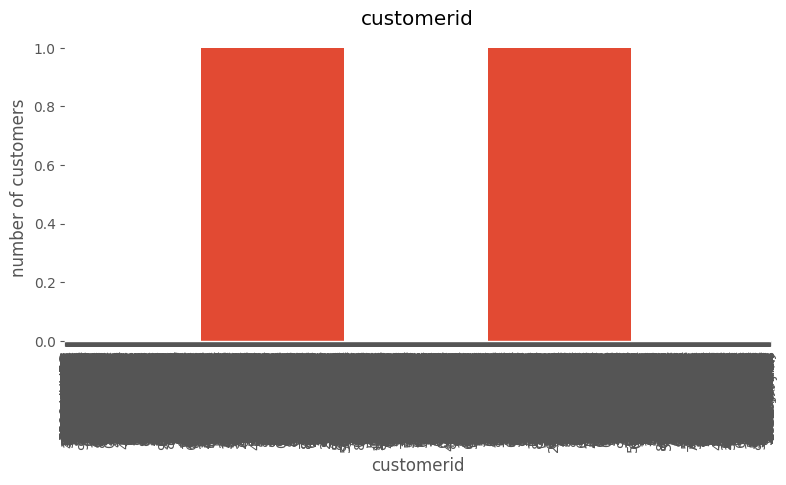

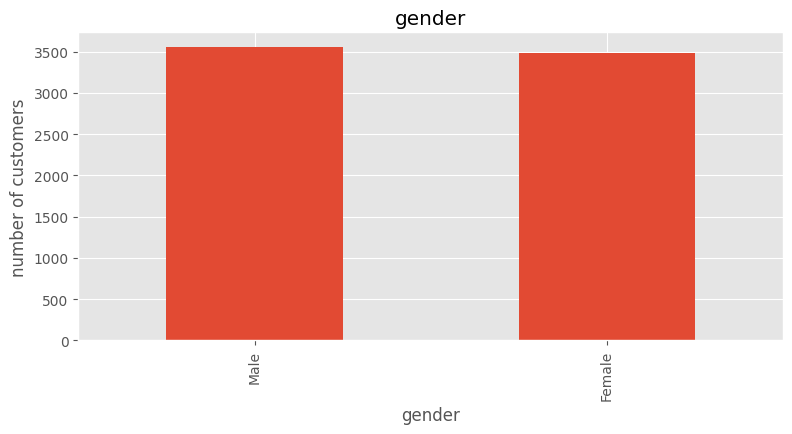

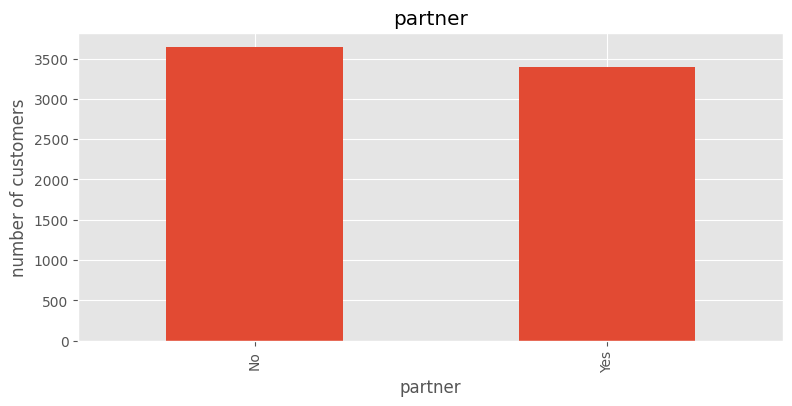

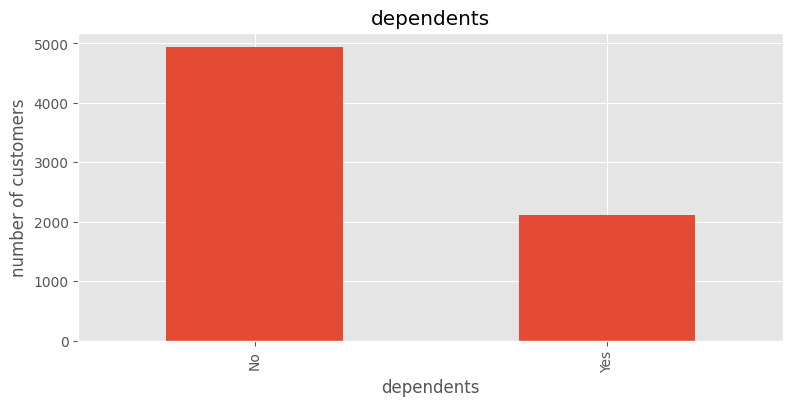

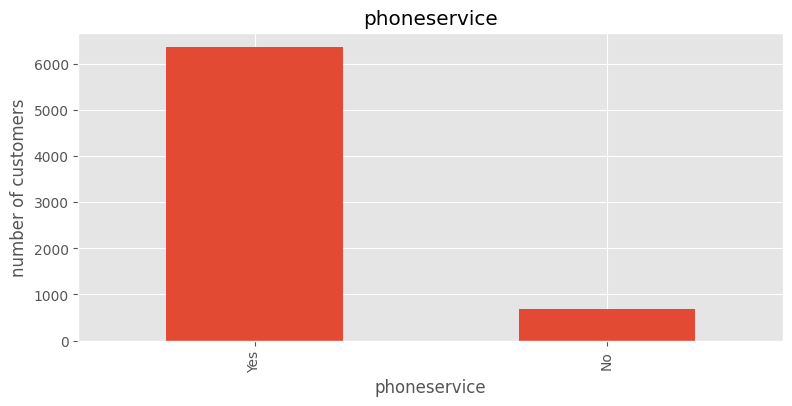

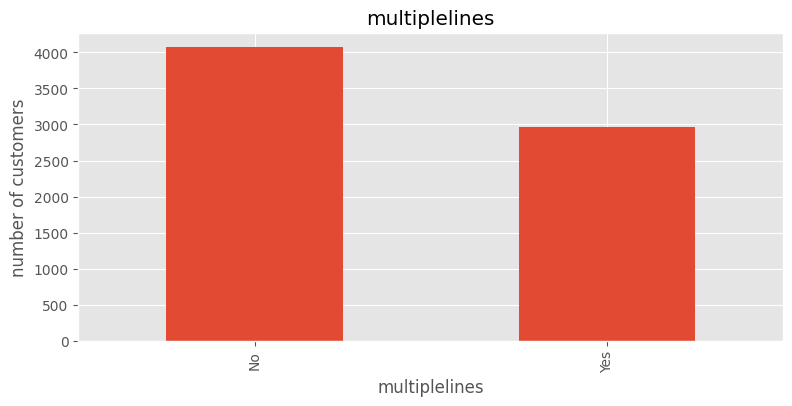

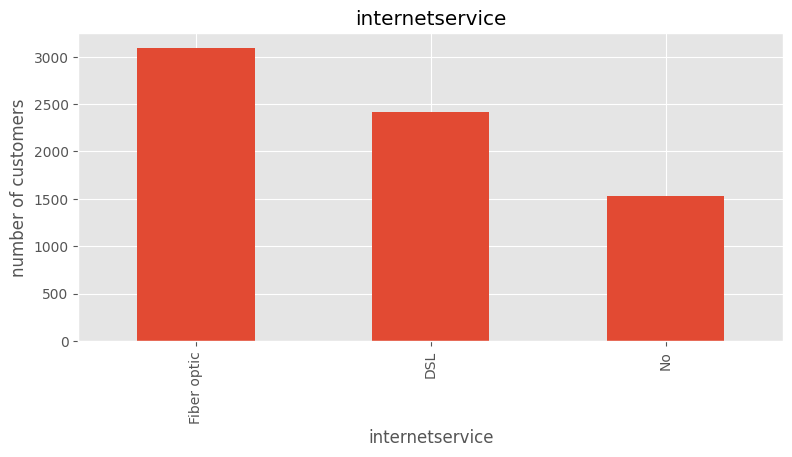

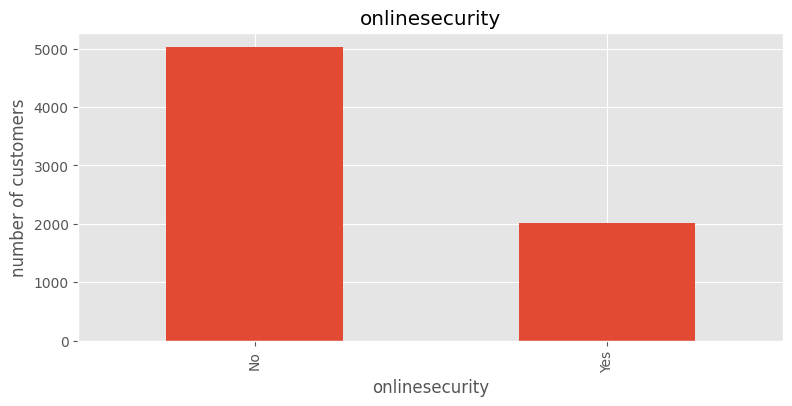

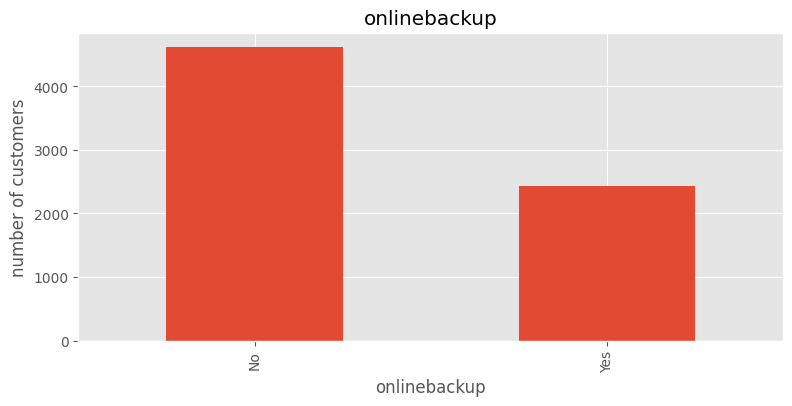

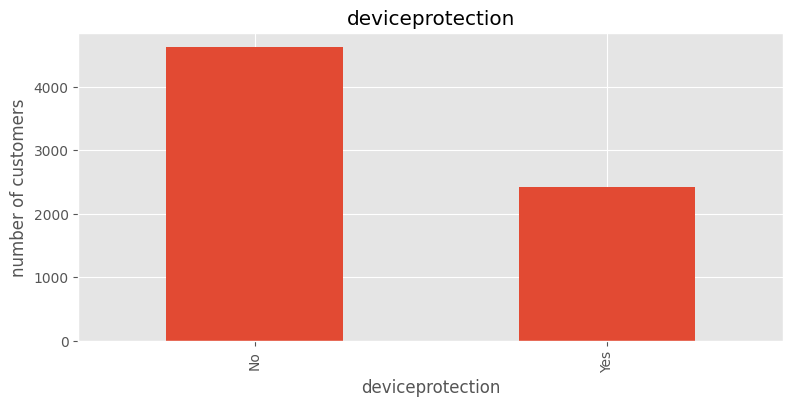

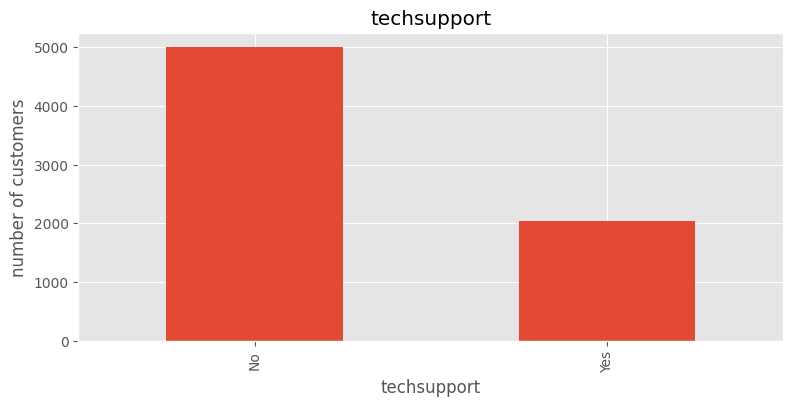

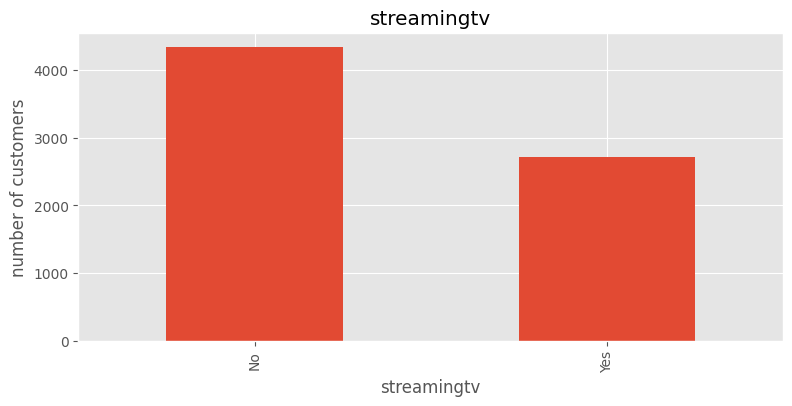

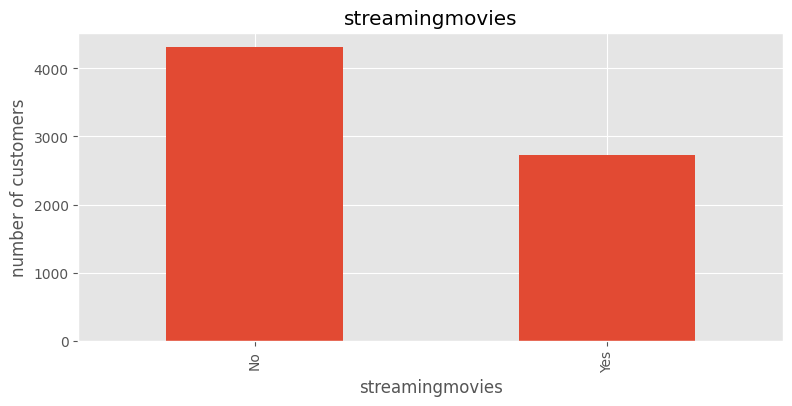

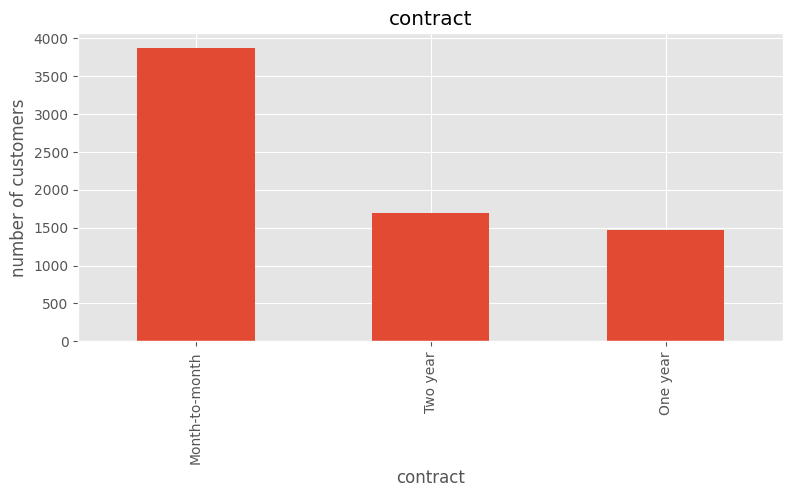

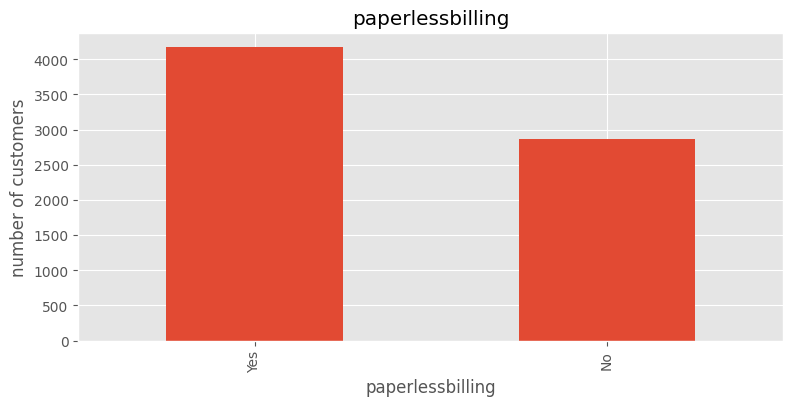

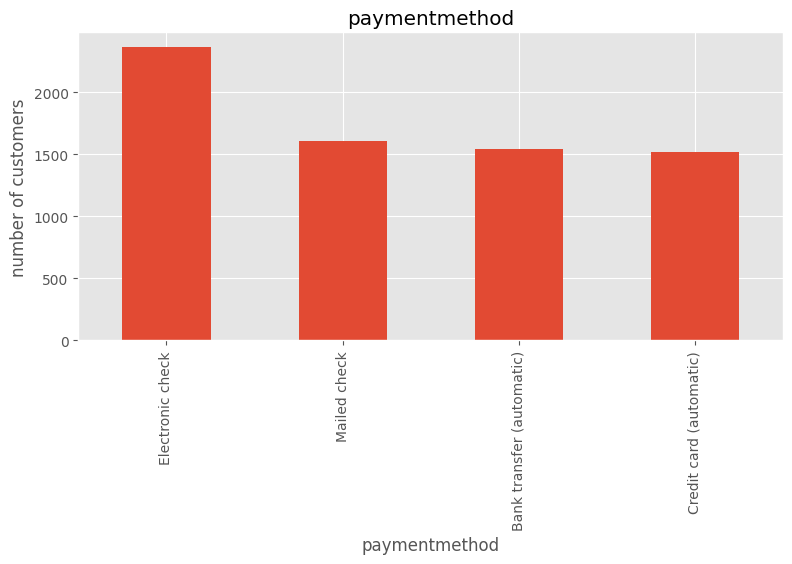

In [ ]:
# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cats_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

berdasrakan analisis pada kolom kategorikal pada seluruh customer diperoleh :
1. customer pria lebih banya dari wanita tapi perbedaannya tidak terlalu signifikan
2. jumlah customer yang tidak memiliki partner lebih banyak daripada yang memiliki partner
3. jumlah customer yang tidak memiliki tanggungan lebih banyak daripada yang memiliki tanggungan
4. jumlah customer yang menggunakan phoneservice lebih banyak daripada yang tidak memiliki phoneservice
5. jumlah customer yang tidak menggunakan muliplelines lebih banyak daripada yang tidak memiliki muliplelines
6. jumlah customer yang  menggunakan fiberoptic lebih banyak daripada yang menggunakan dsl
7. jumlah customer yang tidak menggunakan onlinesecurity lebih banyak daripada yang menggunakan onlinesecurity
8. jumlah customer yang tidak menggunakan onlinebackup lebih banyak daripada yang menggunakan onlinebackup
9. jumlah customer yang tidak menggunakan device protection lebih banyak daripada yang menggunakan deviceprotection
10. jumlah customer yang tidak menggunakan techsupport lebih banyak daripada yang menggunakan techsupport
11. jumlah customer yang tidak menggunakan streamingtv lebih banyak daripada yang menggunakan streamingtv
12. jumlah customer yang tidak menggunakan streamingmovies lebih banyak daripada yang menggunakan streamingmovies
13. mayoritas customer berlangganan dalam peride bulanan (month to month)
14. jumlah customer yang menggunakan paperlessbilling lebih banyak daripada yang tidak menggunakan paperlessbilling
15. mayoritas customer menggunakan electronic check sebagai metode pembayaran



### Numerical

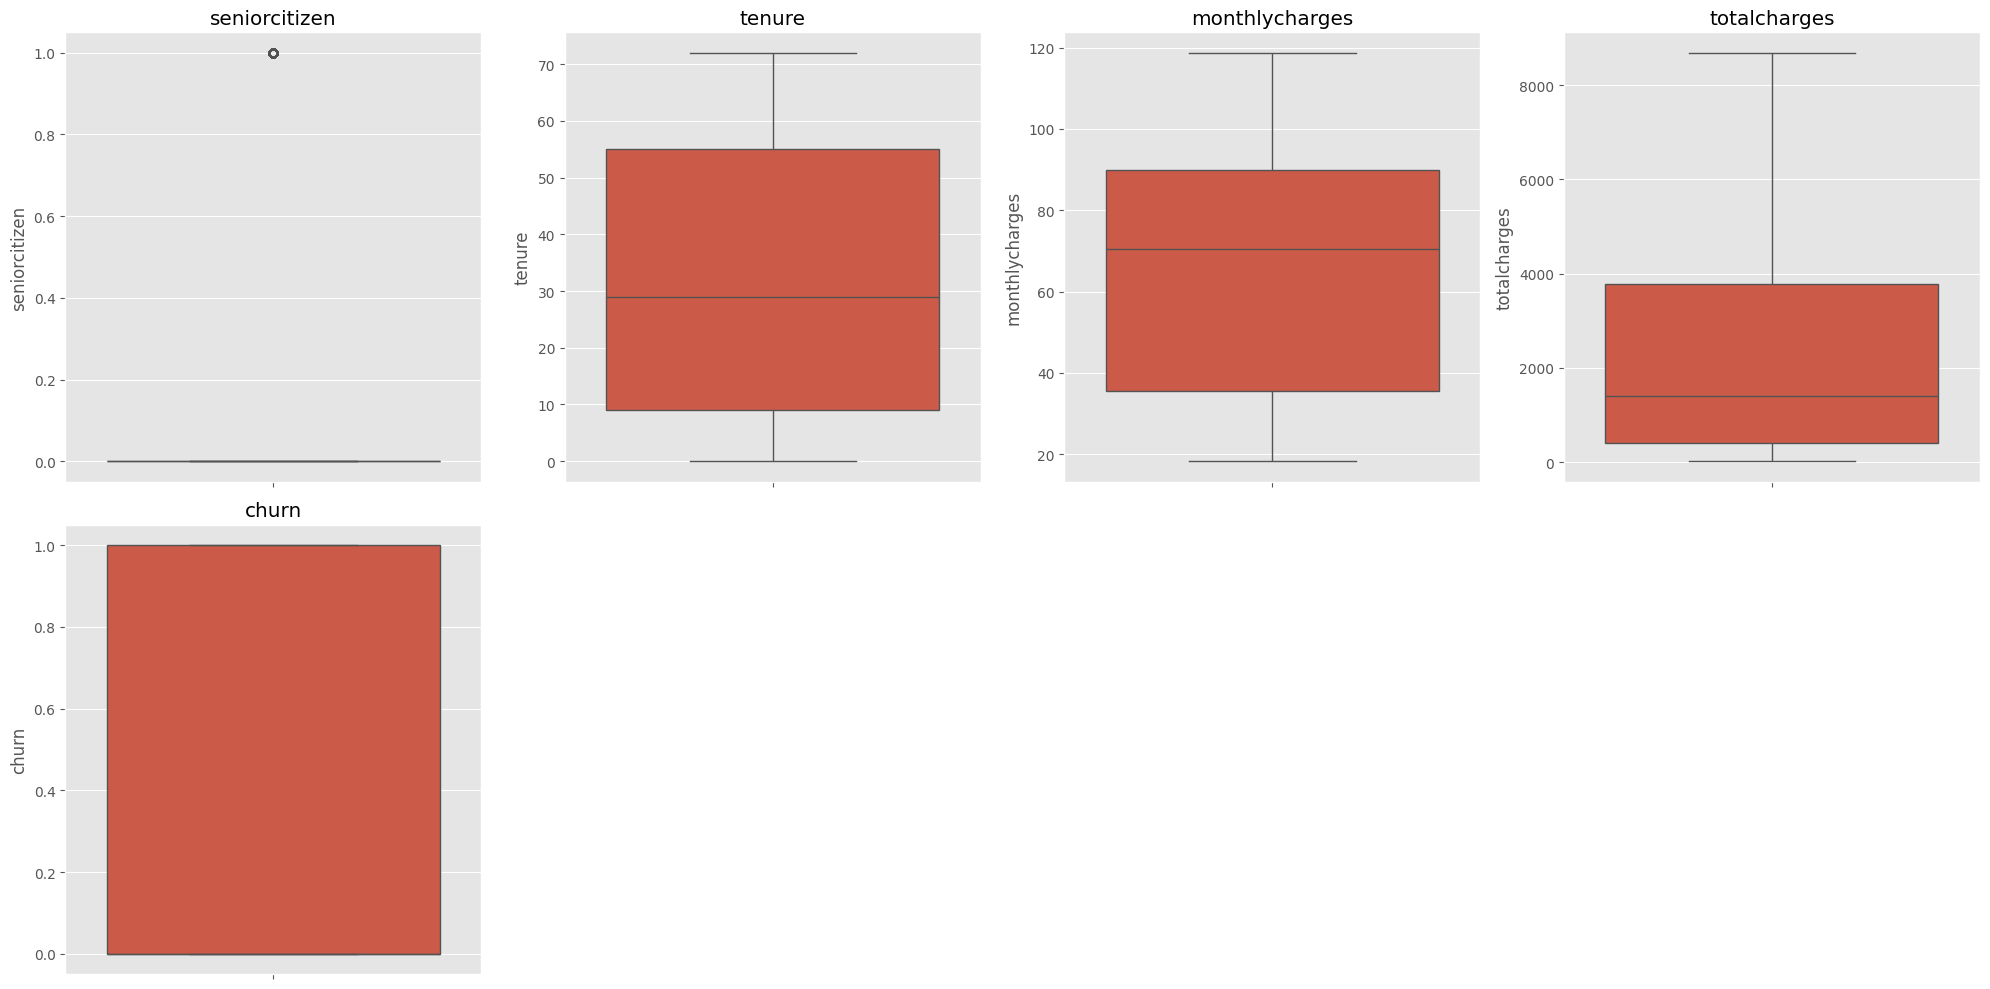

In [ ]:
import math
# Assuming 'nums_col' contains the numerical column names from your previous code.
num_plots = len(nums_col)
num_rows = math.ceil(num_plots / 4)  # Calculate the number of rows needed

plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size based on the number of rows

for i, col in enumerate(nums_col):
    plt.subplot(num_rows, 4, i + 1)  # Create subplots in a 4-column grid
    sns.boxplot(y=df[col], orient='v')  # Vertical boxplot
    plt.title(col)

plt.tight_layout()
plt.show()

tidak terdapat outlier pada data numerik

##Analisis Multivariate

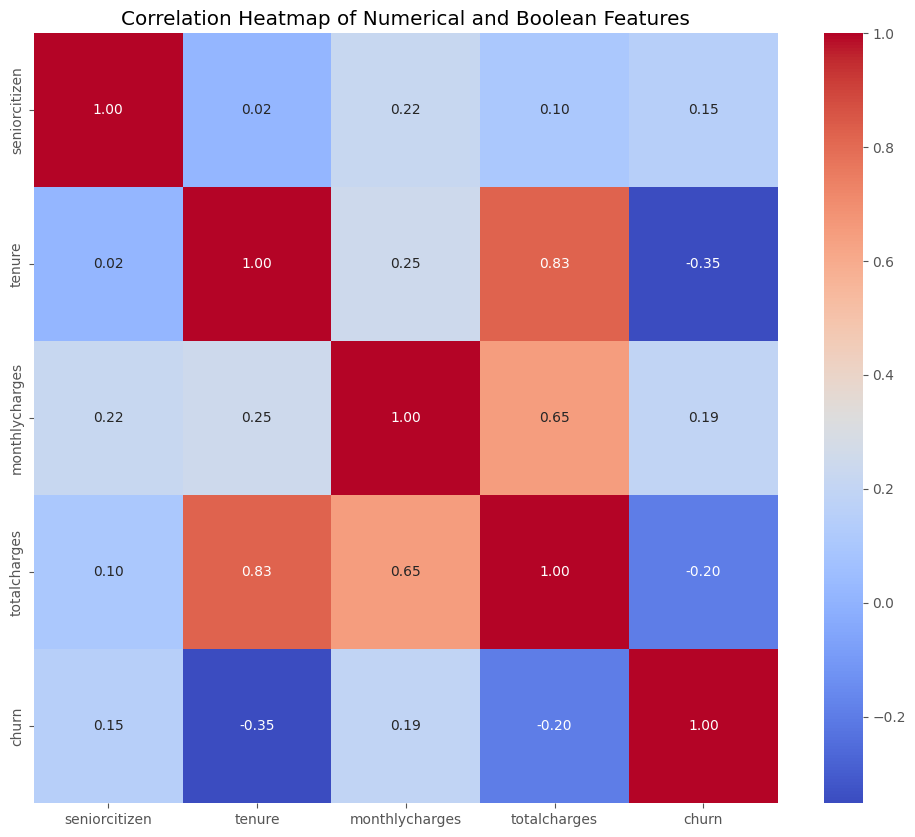

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[nums_col].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical and Boolean Features')
plt.show()

1. seniorcitizen dan monthlycharges memiliki korelasi positif atau hubungan yang berbanding lurus dengan status churn customer, meskipun nilai korelasi tidak terlalu kuat
2. tenure dan totalcharges memiliki korelasi negatif atau hubungan yang tidak berbanding lurus dengan status churn customer.

<Figure size 2000x400 with 0 Axes>

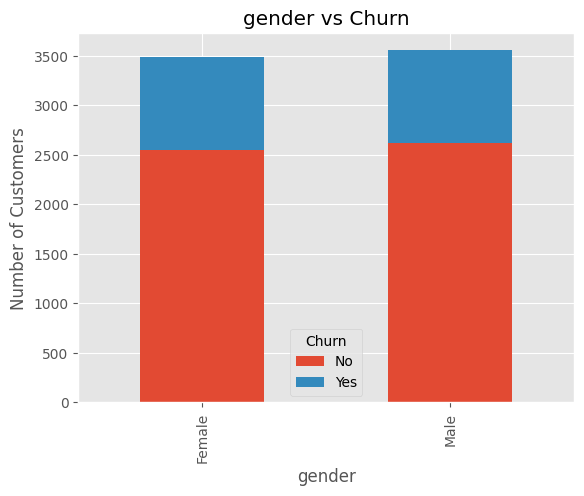

<Figure size 2000x400 with 0 Axes>

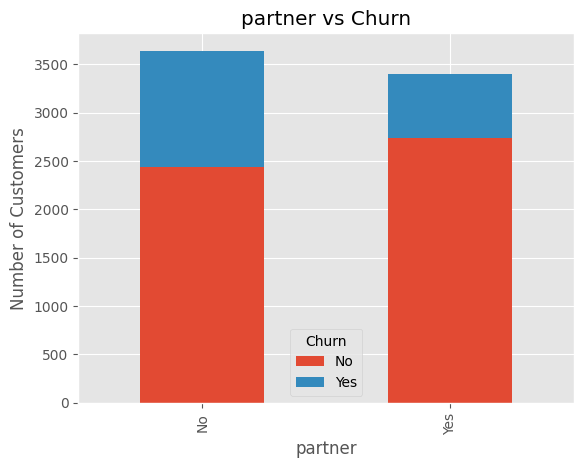

<Figure size 2000x400 with 0 Axes>

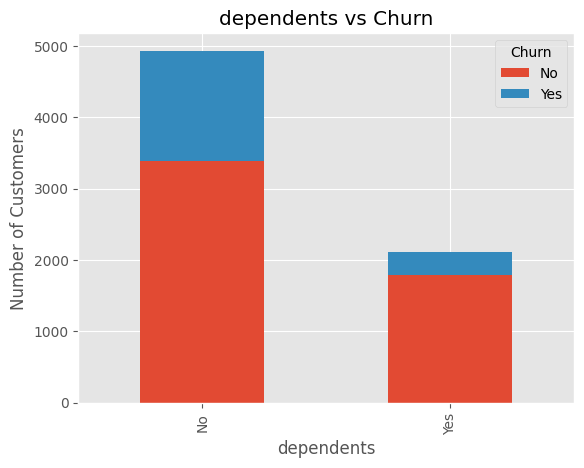

<Figure size 2000x400 with 0 Axes>

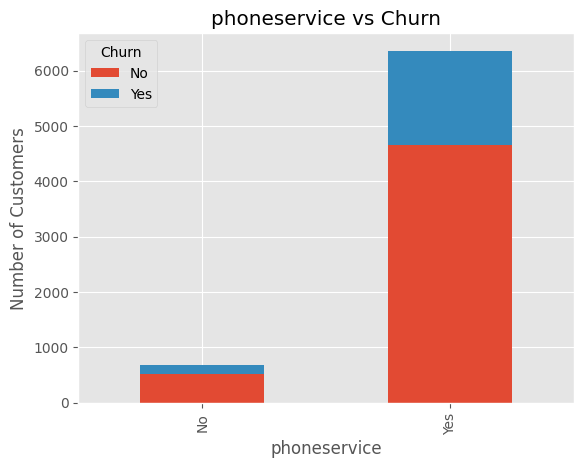

<Figure size 2000x400 with 0 Axes>

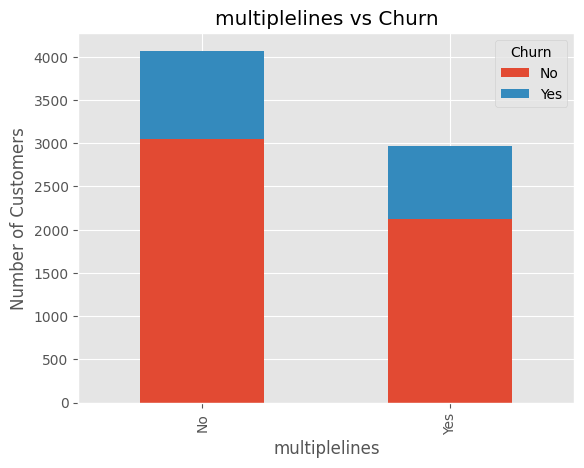

<Figure size 2000x400 with 0 Axes>

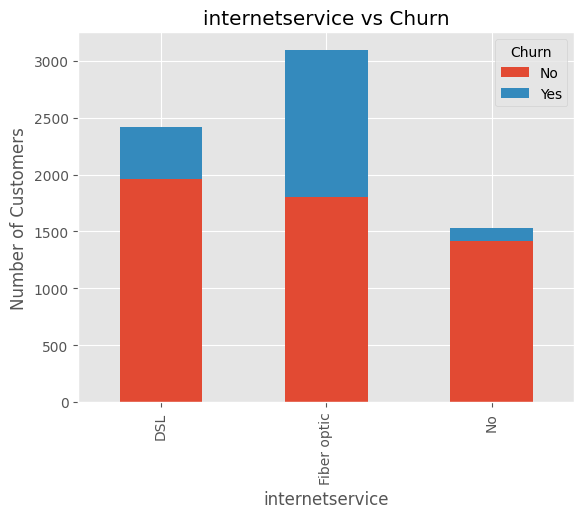

<Figure size 2000x400 with 0 Axes>

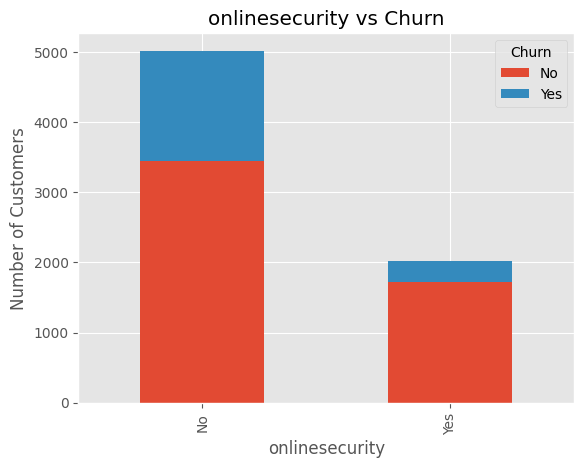

<Figure size 2000x400 with 0 Axes>

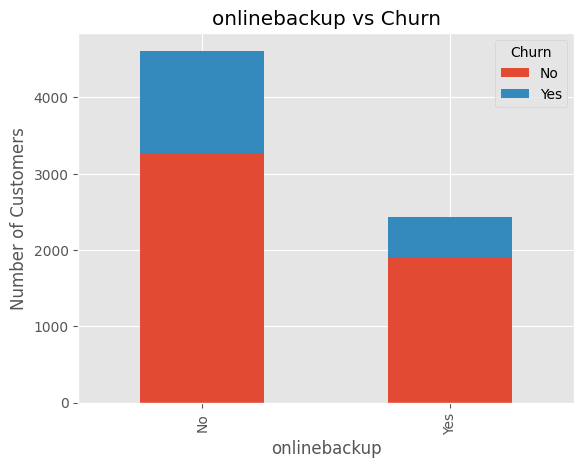

<Figure size 2000x400 with 0 Axes>

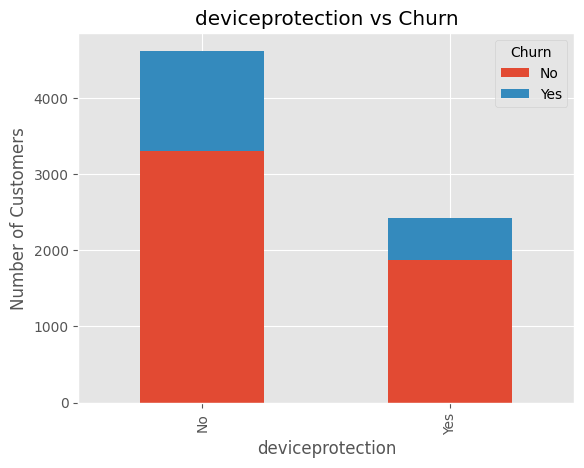

<Figure size 2000x400 with 0 Axes>

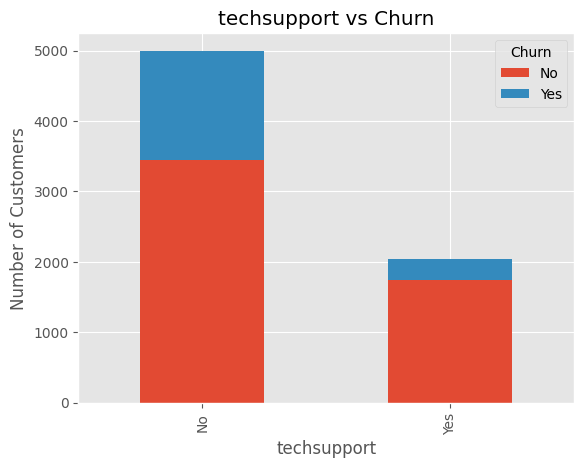

<Figure size 2000x400 with 0 Axes>

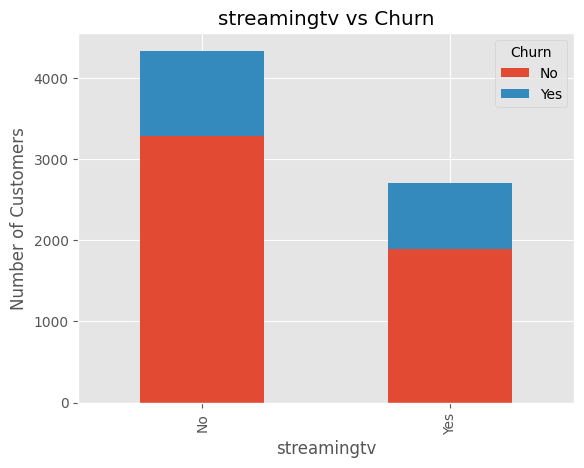

<Figure size 2000x400 with 0 Axes>

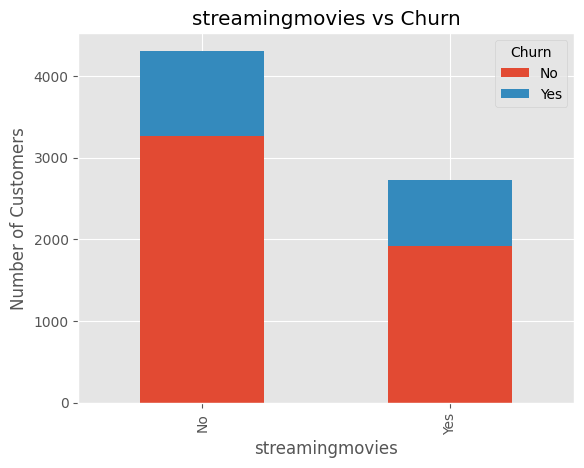

<Figure size 2000x400 with 0 Axes>

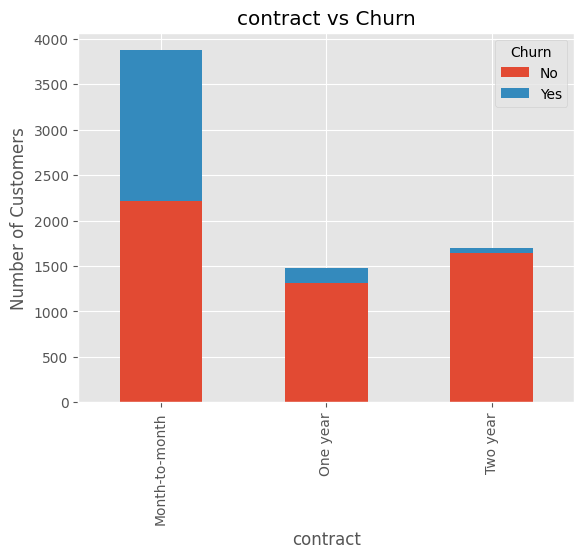

<Figure size 2000x400 with 0 Axes>

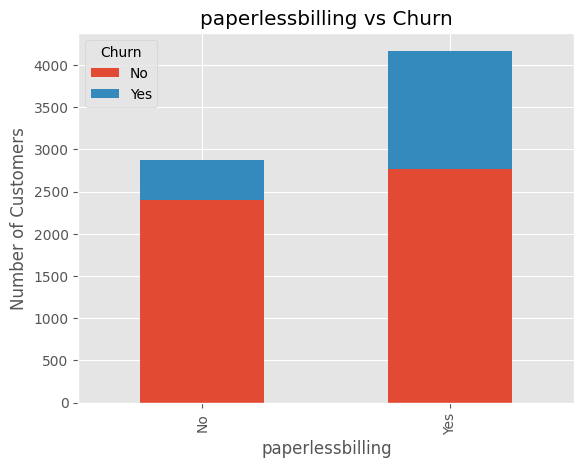

<Figure size 2000x400 with 0 Axes>

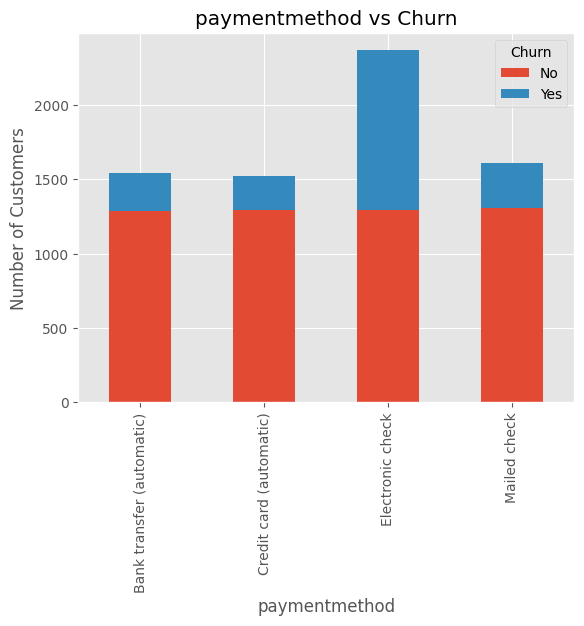

In [ ]:
# categorical column vs churn
plt.style.use("ggplot")

for column in cats_col:
    if column != 'customerid':  # Exclude customerid
        plt.figure(figsize=(20, 4))
        df.groupby(column)['churn'].value_counts().unstack().plot(kind='bar', stacked=True)
        plt.xlabel(column)
        plt.ylabel("Number of Customers")
        plt.title(f"{column} vs Churn")
        plt.legend(title='Churn', labels=['No', 'Yes'])
        plt.show()

1. jumlah customer perempuan yang churned lebih banyak dibanding laki2, tetapi perbedaannya tidak signifikan
2. jumlah customer yang churned mayoritas telah memiliki partner
3. jumlah customer yang churned mayoritas tidak memiliki tanggungan
4. jumlah customer yang churned mayoritas menggunakan phoneservice
5. jumlah customer yang churned mayoritas tidak menggunakan multiplelines
6. jumlah customer yang churned mayoritas menggunakan fiberoptic
7. jumlah customer yang churned mayoritas tidak menggunakan onlinesecurity
8. jumlah customer yang churned mayoritas tidak menggunakan onlinebackup
9. jumlah customer yang churned mayoritas tidak menggunakan deviceprotection
10. jumlah customer yang churned mayoritas tidak menggunakan techsupport
11. jumlah customer yang churned mayoritas tidak menggunakan streamingtv
12. jumlah customer yang churned mayoritas tidak menggunakan streamingmovie
13. jumlah customer yang churned mayoritas berlangganan month to month
14. jumlah customer yang churned mayoritas menggunakan paperlesbilling
15. jumlah customer yang churned mayoritas menggunakan electronic check

#Feature Engineering

## Encoding

In [ ]:
#menghapus kolom customer id
data = df.copy()

data = data.drop(columns = ['customerid'])

In [ ]:
#encoding

data['gender'] = data['gender'].replace({'Female': 0, 'Male': 1})
data['partner'] = data['partner'].replace({'Yes': 0, 'No': 1})
data['dependents'] = data['dependents'].replace({'Yes': 0, 'No': 1})
data['phoneservice'] = data['phoneservice'].replace({'Yes': 0, 'No': 1})
data['multiplelines'] = data['multiplelines'].replace({'Yes': 0, 'No': 1})
data['internetservice'] = data['internetservice'].replace({'Fiber optic': 2, 'DSL': 1, 'No' : 0})
data['onlinesecurity'] = data['onlinesecurity'].replace({'Yes': 0, 'No': 1})
data['onlinebackup'] = data['onlinebackup'].replace({'Yes': 0, 'No': 1})
data['deviceprotection'] = data['deviceprotection'].replace({'Yes': 0, 'No': 1})
data['techsupport'] = data['techsupport'].replace({'Yes': 0, 'No': 1})
data['streamingtv'] = data['streamingtv'].replace({'Yes': 0, 'No': 1})
data['streamingmovies'] = data['streamingmovies'].replace({'Yes': 0, 'No': 1})
data['contract'] = data['contract'].replace({'Month-to-month': 2, 'One year': 0, 'Two year': 1})
data['paperlessbilling'] = data['paperlessbilling'].replace({'Yes': 1, 'No': 0})
data['paymentmethod'] = data['paymentmethod'].replace({'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 0 })
data['churn'] = data['churn'].replace({'Yes': 0, 'No': 1})

data

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,2,1,3,29.85,29.85,0
1,1,0,1,1,34,0,1,1,0,1,0,1,1,1,0,0,2,56.95,1889.50,0
2,1,0,1,1,2,0,1,1,0,0,1,1,1,1,2,1,2,53.85,108.15,1
3,1,0,1,1,45,1,1,1,0,1,0,0,1,1,0,0,1,42.30,1840.75,0
4,0,0,1,1,2,0,1,2,1,1,1,1,1,1,2,1,3,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,24,0,0,1,0,1,0,0,0,0,0,1,2,84.80,1990.50,0
7039,0,0,0,0,72,0,0,2,1,0,0,1,0,0,0,1,0,103.20,7362.90,0
7040,0,0,0,0,11,1,1,1,0,1,1,1,1,1,2,1,3,29.60,346.45,0
7041,1,1,0,1,4,0,0,2,1,1,1,1,1,1,2,1,2,74.40,306.60,1


In [ ]:
# prompt: code to convert data to csv

# Assuming 'data' DataFrame from the provided code is available.

# Convert the DataFrame to CSV format
data.to_csv('telecom_churn_processed.csv', index=False)

# Download the CSV file to your local machine
from google.colab import files
files.download('telecom_churn_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Split


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['churn'])
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(7043, 19)

In [ ]:
X_train.shape

(5634, 19)

## Handling Imbalance

In [ ]:
y_train.value_counts()

,count
churn,
0,4138
1,1496


In [ ]:
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

,count
churn,
0,4138
1,4138
